In [2]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt

In [3]:
df=pa.read_csv('AAPL.csv')

In [4]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [9]:
X=df.reset_index()['close']

In [10]:
X

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

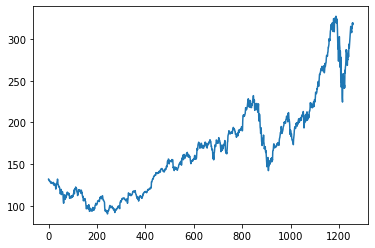

In [11]:
plt.plot(X)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
ms=MinMaxScaler(feature_range=(0, 1))

In [19]:
X=ms.fit_transform(np.array(X).reshape(-1,1))

In [37]:
#spliting the data into train and test
traning_size=int(len(X)*0.65)

test_size=len(X)-traning_size
train_data,test_data=X[0:traning_size,:],X[traning_size:len(X),:1]


In [40]:
def datasetcal(dataset,time_step=1):
    data_X=[]
    data_Y=[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        data_X.append(a)
        data_Y.append(dataset[i+time_step,0])
    return np.array(data_X), np.array(data_Y)
    
    

In [43]:
X_train,Y_train=datasetcal(train_data,100)
X_test,Y_test=datasetcal(test_data,100)

In [44]:
print(X_train.shape), print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [46]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [48]:
X_train.shape

(716, 100, 1)

In [47]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM


In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 4s 5ms/sample - loss: 2.6320e-04 - val_loss: 0.0014
Epoch 2/100
716/716 [==============================] - 4s 5ms/sample - loss: 2.6896e-04 - val_loss: 0.0017
Epoch 3/100
716/716 [==============================] - 4s 5ms/sample - loss: 2.5859e-04 - val_loss: 0.0013
Epoch 4/100
716/716 [==============================] - 4s 5ms/sample - loss: 2.5458e-04 - val_loss: 0.0012
Epoch 5/100
716/716 [==============================] - 4s 5ms/sample - loss: 2.7714e-04 - val_loss: 0.0012
Epoch 6/100
716/716 [==============================] - 4s 5ms/sample - loss: 2.6196e-04 - val_loss: 0.0016
Epoch 7/100
716/716 [==============================] - 4s 5ms/sample - loss: 2.2845e-04 - val_loss: 0.0011
Epoch 8/100
716/716 [==============================] - 4s 5ms/sample - loss: 2.2753e-04 - val_loss: 0.0020
Epoch 9/100
716/716 [==============================] - 4s 5ms/sample - loss: 2.2922e-04 - val_loss

716/716 [==============================] - 4s 5ms/sample - loss: 1.1056e-04 - val_loss: 9.8875e-04
Epoch 76/100
716/716 [==============================] - 4s 5ms/sample - loss: 1.1947e-04 - val_loss: 6.7354e-04
Epoch 77/100
716/716 [==============================] - 4s 5ms/sample - loss: 1.0817e-04 - val_loss: 7.6024e-04
Epoch 78/100
716/716 [==============================] - 4s 5ms/sample - loss: 1.0585e-04 - val_loss: 8.1870e-04
Epoch 79/100
716/716 [==============================] - 4s 5ms/sample - loss: 1.0558e-04 - val_loss: 7.0004e-04
Epoch 80/100
716/716 [==============================] - 4s 5ms/sample - loss: 1.0784e-04 - val_loss: 8.3400e-04
Epoch 81/100
716/716 [==============================] - 4s 5ms/sample - loss: 1.0707e-04 - val_loss: 7.0797e-04
Epoch 82/100
716/716 [==============================] - 4s 5ms/sample - loss: 1.2568e-04 - val_loss: 9.0156e-04
Epoch 83/100
716/716 [==============================] - 4s 5ms/sample - loss: 1.3367e-04 - val_loss: 6.7472e-04
Epoch

In [62]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [63]:
train_prediction=ms.inverse_transform(train_prediction)
test_prediction=ms.inverse_transform(test_prediction)

In [58]:
from sklearn import metrics

C:\Users\91912\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [64]:
import math
math.sqrt(metrics.mean_squared_error(Y_test,test_prediction))

239.75812012047314

In [65]:
math.sqrt(metrics.mean_squared_error(Y_train,train_prediction))

142.41050848733838

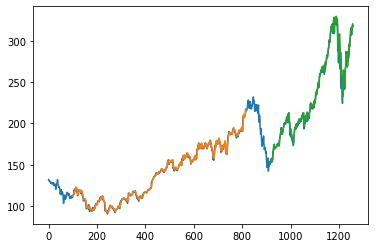

In [75]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_prediction)+look_back, :] = train_prediction
# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_prediction)+(look_back*2)+1:len(X)-1, :] = test_prediction
# plot baseline and predictions
plt.plot(ms.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [76]:
len(test_data)

441

In [77]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [78]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [84]:
#prediction for next 30 days
lst_output=[]
n_steps=100
i=0
while(i<100):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0 day input [0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.97007024 0.97740281
 0.98519844 0.99289006 1.00036061 1.00754452 1.01447511 1.02125502
 1.02800262 1.03481162 1.04173112 1.04876542 1.05588567 1.06304753
 1.07020688 1.07733059 1.08440065 1.09141338 1.0983

14 day output [[1.256993]]
15 day input [0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.97007024 0.97740281 0.98519844 0.99289006 1.00036061
 1.00754452 1.01447511 1.02125502 1.02800262 1.03481162 1.04173112
 1.04876542 1.05588567 1.06304753 1.07020688 1.07733059 1.08440065
 1.09141338 1.09837437 1.10529196 1.1121732  1.11902034 1.12583125
 1.13259947 1.1393168  1.14597476 1.15256667 1.1590873  1.1655339
 1.17190456 1.1781975  1.18

23 day output [[1.2972986]]
24 day input [0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.97007024 0.97740281
 0.98519844 0.99289006 1.00036061 1.00754452 1.01447511 1.02125502
 1.02800262 1.03481162 1.04173112 1.04876542 1.05588567 1.06304753
 1.07020688 1.07733059 1.08440065 1.09141338 1.09837437 1.10529196
 1.1121732  1.11902034 1.12583125 1.13259947 1.1393168  1.14597476
 1.15256667 1.1590873  1.1655339  1.17190456 1.1781975  1.18441105
 1.19054389 1.19659328 1.20255625 1.20843053 1.21421313 1.21990204
 1.2254951  1.23099148

32 day output [[1.3286943]]
33 day input [0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.97007024 0.97740281 0.98519844 0.99289006 1.00036061
 1.00754452 1.01447511 1.02125502 1.02800262 1.03481162 1.04173112
 1.04876542 1.05588567 1.06304753 1.07020688 1.07733059 1.08440065
 1.09141338 1.09837437 1.10529196 1.1121732  1.11902034 1.12583125
 1.13259947 1.1393168  1.14597476 1.15256667 1.1590873  1.1655339
 1.17190456 1.1781975  1.18441105 1.19054389 1.19659328 1.20255625
 1.20843053 1.21421313 1.21990204 1.2254951  1.23099148 1.23639011
 1.24169028 1.2468915  1.2519927  1.25699306 1.2618922  1.26668954
 1.27138472 1.27597904 1.

40 day output [[1.3505993]]
41 day input [0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.97007024
 0.97740281 0.98519844 0.99289006 1.00036061 1.00754452 1.01447511
 1.02125502 1.02800262 1.03481162 1.04173112 1.04876542 1.05588567
 1.06304753 1.07020688 1.07733059 1.08440065 1.09141338 1.09837437
 1.10529196 1.1121732  1.11902034 1.12583125 1.13259947 1.1393168
 1.14597476 1.15256667 1.1590873  1.1655339  1.17190456 1.1781975
 1.18441105 1.19054389 1.19659328 1.20255625 1.20843053 1.21421313
 1.21990204 1.2254951  1.23099148 1.23639011 1.24169028 1.2468915
 1.2519927  1.25699306 1.2618922  1.26668954 1.27138472 1.27597904
 1.28047156 1.284863   1.28915393 1.29329848 1.29729855 1.3011694
 1.30492663 1.30858529 1.

48 day output [[1.3677663]]
49 day input [0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.97007024 0.97740281 0.98519844
 0.99289006 1.00036061 1.00754452 1.01447511 1.02125502 1.02800262
 1.03481162 1.04173112 1.04876542 1.05588567 1.06304753 1.07020688
 1.07733059 1.08440065 1.09141338 1.09837437 1.10529196 1.1121732
 1.11902034 1.12583125 1.13259947 1.1393168  1.14597476 1.15256667
 1.1590873  1.1655339  1.17190456 1.1781975  1.18441105 1.19054389
 1.19659328 1.20255625 1.20843053 1.21421313 1.21990204 1.2254951
 1.23099148 1.23639011 1.24169028 1.2468915  1.2519927  1.25699306
 1.2618922  1.26668954 1.27138472 1.27597904 1.28047156 1.284863
 1.28915393 1.29329848 1.29729855 1.3011694  1.30492663 1.30858529
 1.31215572 1.315642   1.31904268 1.3223536  1.32557118 1.32869434
 1.33172429 1.33466423 1.33

56 day output [[1.3810399]]
57 day input [0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.97007024 0.97740281 0.98519844 0.99289006 1.00036061
 1.00754452 1.01447511 1.02125502 1.02800262 1.03481162 1.04173112
 1.04876542 1.05588567 1.06304753 1.07020688 1.07733059 1.08440065
 1.09141338 1.09837437 1.10529196 1.1121732  1.11902034 1.12583125
 1.13259947 1.1393168  1.14597476 1.15256667 1.1590873  1.1655339
 1.17190456 1.1781975  1.18441105 1.19054389 1.19659328 1.20255625
 1.20843053 1.21421313 1.21990204 1.2254951  1.23099148 1.23639011
 1.24169028 1.2468915  1.2519927  1.25699306 1.2618922  1.26668954
 1.27138472 1.27597904 1.28047156 1.284863   1.28915393 1.29329848
 1.29729855 1.3011694  1.30492663 1.30858529 1.31215572 1.315642
 1.31904268 1.3223536  1.32557118 1.32869434 1.33172429 1.33466423
 1.33751798 1.34028959 1.34298193 1.34559691 1.34813571 1.35059929
 1.3529886  1.35530436 1.

64 day output [[1.3911998]]
65 day input [0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.97007024
 0.97740281 0.98519844 0.99289006 1.00036061 1.00754452 1.01447511
 1.02125502 1.02800262 1.03481162 1.04173112 1.04876542 1.05588567
 1.06304753 1.07020688 1.07733059 1.08440065 1.09141338 1.09837437
 1.10529196 1.1121732  1.11902034 1.12583125 1.13259947 1.1393168
 1.14597476 1.15256667 1.1590873  1.1655339  1.17190456 1.1781975
 1.18441105 1.19054389 1.19659328 1.20255625 1.20843053 1.21421313
 1.21990204 1.2254951  1.23099148 1.23639011 1.24169028 1.2468915
 1.2519927  1.25699306 1.2618922  1.26668954 1.27138472 1.27597904
 1.28047156 1.284863   1.28915393 1.29329848 1.29729855 1.3011694
 1.30492663 1.30858529 1.31215572 1.315642   1.31904268 1.3223536
 1.32557118 1.32869434 1.33172429 1.33466423 1.33751798 1.34028959
 1.34298193 1.34559691 1.34813571 1.35059929 1.3529886  1.35530436
 1.35754871 1.35972333 1.36183059 1.36387217 1.36585033 1.36776626
 1.36962152 1.37141776 1.3

72 day output [[1.3989174]]
73 day input [0.99289006 1.00036061 1.00754452 1.01447511 1.02125502 1.02800262
 1.03481162 1.04173112 1.04876542 1.05588567 1.06304753 1.07020688
 1.07733059 1.08440065 1.09141338 1.09837437 1.10529196 1.1121732
 1.11902034 1.12583125 1.13259947 1.1393168  1.14597476 1.15256667
 1.1590873  1.1655339  1.17190456 1.1781975  1.18441105 1.19054389
 1.19659328 1.20255625 1.20843053 1.21421313 1.21990204 1.2254951
 1.23099148 1.23639011 1.24169028 1.2468915  1.2519927  1.25699306
 1.2618922  1.26668954 1.27138472 1.27597904 1.28047156 1.284863
 1.28915393 1.29329848 1.29729855 1.3011694  1.30492663 1.30858529
 1.31215572 1.315642   1.31904268 1.3223536  1.32557118 1.32869434
 1.33172429 1.33466423 1.33751798 1.34028959 1.34298193 1.34559691
 1.34813571 1.35059929 1.3529886  1.35530436 1.35754871 1.35972333
 1.36183059 1.36387217 1.36585033 1.36776626 1.36962152 1.37141776
 1.37315619 1.37483883 1.37646723 1.37804234 1.37956595 1.38103986
 1.38246477 1.38384306 1.

80 day output [[1.4047487]]
81 day input [1.04876542 1.05588567 1.06304753 1.07020688 1.07733059 1.08440065
 1.09141338 1.09837437 1.10529196 1.1121732  1.11902034 1.12583125
 1.13259947 1.1393168  1.14597476 1.15256667 1.1590873  1.1655339
 1.17190456 1.1781975  1.18441105 1.19054389 1.19659328 1.20255625
 1.20843053 1.21421313 1.21990204 1.2254951  1.23099148 1.23639011
 1.24169028 1.2468915  1.2519927  1.25699306 1.2618922  1.26668954
 1.27138472 1.27597904 1.28047156 1.284863   1.28915393 1.29329848
 1.29729855 1.3011694  1.30492663 1.30858529 1.31215572 1.315642
 1.31904268 1.3223536  1.32557118 1.32869434 1.33172429 1.33466423
 1.33751798 1.34028959 1.34298193 1.34559691 1.34813571 1.35059929
 1.3529886  1.35530436 1.35754871 1.35972333 1.36183059 1.36387217
 1.36585033 1.36776626 1.36962152 1.37141776 1.37315619 1.37483883
 1.37646723 1.37804234 1.37956595 1.38103986 1.38246477 1.38384306
 1.38517547 1.38646388 1.38770926 1.3889128  1.3900758  1.39119983
 1.3922857  1.39333487 1

88 day output [[1.4091338]]
89 day input [1.10529196 1.1121732  1.11902034 1.12583125 1.13259947 1.1393168
 1.14597476 1.15256667 1.1590873  1.1655339  1.17190456 1.1781975
 1.18441105 1.19054389 1.19659328 1.20255625 1.20843053 1.21421313
 1.21990204 1.2254951  1.23099148 1.23639011 1.24169028 1.2468915
 1.2519927  1.25699306 1.2618922  1.26668954 1.27138472 1.27597904
 1.28047156 1.284863   1.28915393 1.29329848 1.29729855 1.3011694
 1.30492663 1.30858529 1.31215572 1.315642   1.31904268 1.3223536
 1.32557118 1.32869434 1.33172429 1.33466423 1.33751798 1.34028959
 1.34298193 1.34559691 1.34813571 1.35059929 1.3529886  1.35530436
 1.35754871 1.35972333 1.36183059 1.36387217 1.36585033 1.36776626
 1.36962152 1.37141776 1.37315619 1.37483883 1.37646723 1.37804234
 1.37956595 1.38103986 1.38246477 1.38384306 1.38517547 1.38646388
 1.38770926 1.3889128  1.3900758  1.39119983 1.3922857  1.39333487
 1.39434826 1.39532685 1.39627206 1.39718497 1.39806604 1.39891744
 1.39973962 1.40053344 1.4

97 day output [[1.41277]]
98 day input [1.1655339  1.17190456 1.1781975  1.18441105 1.19054389 1.19659328
 1.20255625 1.20843053 1.21421313 1.21990204 1.2254951  1.23099148
 1.23639011 1.24169028 1.2468915  1.2519927  1.25699306 1.2618922
 1.26668954 1.27138472 1.27597904 1.28047156 1.284863   1.28915393
 1.29329848 1.29729855 1.3011694  1.30492663 1.30858529 1.31215572
 1.315642   1.31904268 1.3223536  1.32557118 1.32869434 1.33172429
 1.33466423 1.33751798 1.34028959 1.34298193 1.34559691 1.34813571
 1.35059929 1.3529886  1.35530436 1.35754871 1.35972333 1.36183059
 1.36387217 1.36585033 1.36776626 1.36962152 1.37141776 1.37315619
 1.37483883 1.37646723 1.37804234 1.37956595 1.38103986 1.38246477
 1.38384306 1.38517547 1.38646388 1.38770926 1.3889128  1.3900758
 1.39119983 1.3922857  1.39333487 1.39434826 1.39532685 1.39627206
 1.39718497 1.39806604 1.39891744 1.39973962 1.40053344 1.40129972
 1.40203917 1.40275288 1.40344191 1.40410662 1.40474868 1.40536773
 1.40596509 1.40654135 1.

In [85]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

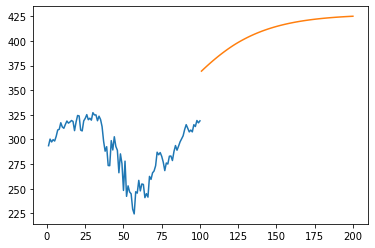

In [86]:
plt.plot(day_new,ms.inverse_transform(X[1158:]))
plt.plot(day_pred,ms.inverse_transform(lst_output))